In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 15 15:21:46 2024

@author: Shane Stevens
"""
#code will likely be changed when collecting data to make gathering certain statistics easier

import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import os


In [2]:
folder = "input_data/"
#list of files to be used
forteen = ["sampled_2014_benign_api.csv","sampled_2014_malware_api.csv"]
files = forteen

# 0 = benign , 1 = malware
data = pd.DataFrame()
for file in files:
    temp_data = pd.read_csv(folder + file)
    if "benign" in file:
        temp_data['Target'] = 0
    elif "malware" in file:
        temp_data['Target'] = 1
    data = pd.concat([data,temp_data])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 0 to 8999
Columns: 1850 entries, apkname to Target
dtypes: int64(1849), object(1)
memory usage: 254.2+ MB


In [3]:
#create the target classes and drop columns from data
y = data['Target']
X = data.drop(['apkname','Target'], axis = 1)
X.head()

,Landroid/accounts/AbstractAccountAuthenticator;.getAccountRemovalAllowed:(Landroid/accounts/AccountAuthenticatorResponse;Landroid/accounts/Account;)Landroid/os/Bundle;,Landroid/accounts/AccountManager;.addAccount:(Ljava/lang/String;Ljava/lang/String;[Ljava/lang/String;Landroid/os/Bundle;Landroid/app/Activity;Landroid/accounts/AccountManagerCallback;Landroid/os/Handler;)Landroid/accounts/AccountManagerFuture;,Landroid/accounts/AccountManager;.addAccountExplicitly:(Landroid/accounts/Account;Ljava/lang/String;Landroid/os/Bundle;)Z,Landroid/accounts/AccountManager;.addOnAccountsUpdatedListener:(Landroid/accounts/OnAccountsUpdateListener;Landroid/os/Handler;Z)V,Landroid/accounts/AccountManager;.blockingGetAuthToken:(Landroid/accounts/Account;Ljava/lang/String;Z)Ljava/lang/String;,Landroid/accounts/AccountManager;.clearPassword:(Landroid/accounts/Account;)V,Landroid/accounts/AccountManager;.confirmCredentials:(Landroid/accounts/Account;Landroid/os/Bundle;Landroid/app/Activity;Landroid/accounts/AccountManagerCallback;Landroid/os/Handler;)Landroid/accounts/AccountManagerFuture;,Landroid/accounts/AccountManager;.getAccounts:()[Landroid/accounts/Account;,Landroid/accounts/AccountManager;.getAccountsByType:(Ljava/lang/String;)[Landroid/accounts/Account;,Landroid/accounts/AccountManager;.getAccountsByTypeAndFeatures:(Ljava/lang/String;[Ljava/lang/String;Landroid/accounts/AccountManagerCallback;Landroid/os/Handler;)Landroid/accounts/AccountManagerFuture;,...,Ljavax/net/ssl/HttpsURLConnection;.getOutputStream:()Ljava/io/OutputStream;,Ljavax/net/ssl/HttpsURLConnection;.setRequestMethod:(Ljava/lang/String;)V,Ljavax/net/ssl/SSLSocket;.getInputStream:()Ljava/io/InputStream;,Ljavax/net/ssl/SSLSocket;.getOutputStream:()Ljava/io/OutputStream;,Lorg/w3c/dom/Document;.getDocumentElement:()Lorg/w3c/dom/Element;,Lorg/w3c/dom/Document;.getElementsByTagName:(Ljava/lang/String;)Lorg/w3c/dom/NodeList;,Lorg/w3c/dom/Document;.getElementsByTagNameNS:(Ljava/lang/String;Ljava/lang/String;)Lorg/w3c/dom/NodeList;,Lorg/w3c/dom/Element;.getAttribute:(Ljava/lang/String;)Ljava/lang/String;,Lorg/w3c/dom/Element;.getElementsByTagName:(Ljava/lang/String;)Lorg/w3c/dom/NodeList;,Lorg/w3c/dom/Element;.getElementsByTagNameNS:(Ljava/lang/String;Ljava/lang/String;)Lorg/w3c/dom/NodeList;
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Only run one of the next two boxes

In [5]:
#split data into testing and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [6]:
#instead of splitting into testing and training, make an entirely different testing set
folder = "input_data/"
#list of files to be used
fifteen = ["sampled_2015_benign_api.csv","sampled_2015_malware_api.csv"]
sixteen = ["sampled_2016_benign_api.csv","sampled_2016_malware_api.csv"]
seventeen = ["sampled_2017_benign_api.csv","sampled_2017_malware_api.csv"]
eighteen = ["sampled_2018_benign_api.csv","sampled_2018_malware_api.csv"]
nineteen = ["sampled_2019_benign_api.csv","sampled_2019_malware_api.csv"]
twenty = ["sampled_2020_benign_api.csv","sampled_2020_malware_api.csv"]
twenty_one = ["sampled_2021_benign_api.csv","sampled_2021_malware_api.csv"]

testing_data = []

for year in [fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twenty_one]:
    print(year)
    files = year
    
    # 0 = benign , 1 = malware
    data = pd.DataFrame()
    for file in files:
        temp_data = pd.read_csv(folder + file)
        if "benign" in file:
            temp_data['Target'] = 0
        elif "malware" in file:
            temp_data['Target'] = 1
        data = pd.concat([data,temp_data])
    data.info()
    testing_data.append(data)

y_train = y
X_train = X

y_test = testing_data[0]['Target']
X_test = testing_data[0].drop(['apkname','Target'], axis = 1)
X_test.head()


['sampled_2015_benign_api.csv', 'sampled_2015_malware_api.csv']
<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 0 to 8999
Columns: 1850 entries, apkname to Target
dtypes: int64(1849), object(1)
memory usage: 254.2+ MB
['sampled_2016_benign_api.csv', 'sampled_2016_malware_api.csv']
<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 0 to 8999
Columns: 1850 entries, apkname to Target
dtypes: int64(1849), object(1)
memory usage: 254.2+ MB
['sampled_2017_benign_api.csv', 'sampled_2017_malware_api.csv']
<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 0 to 8999
Columns: 1850 entries, apkname to Target
dtypes: int64(1849), object(1)
memory usage: 254.2+ MB
['sampled_2018_benign_api.csv', 'sampled_2018_malware_api.csv']
<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 0 to 8999
Columns: 1850 entries, apkname to Target
dtypes: int64(1849), object(1)
memory usage: 254.2+ MB
['sampled_2019_benign_api.csv', 'sampled_2019_malware_api.csv']
<class 'pandas.c

,Landroid/accounts/AbstractAccountAuthenticator;.getAccountRemovalAllowed:(Landroid/accounts/AccountAuthenticatorResponse;Landroid/accounts/Account;)Landroid/os/Bundle;,Landroid/accounts/AccountManager;.addAccount:(Ljava/lang/String;Ljava/lang/String;[Ljava/lang/String;Landroid/os/Bundle;Landroid/app/Activity;Landroid/accounts/AccountManagerCallback;Landroid/os/Handler;)Landroid/accounts/AccountManagerFuture;,Landroid/accounts/AccountManager;.addAccountExplicitly:(Landroid/accounts/Account;Ljava/lang/String;Landroid/os/Bundle;)Z,Landroid/accounts/AccountManager;.addOnAccountsUpdatedListener:(Landroid/accounts/OnAccountsUpdateListener;Landroid/os/Handler;Z)V,Landroid/accounts/AccountManager;.blockingGetAuthToken:(Landroid/accounts/Account;Ljava/lang/String;Z)Ljava/lang/String;,Landroid/accounts/AccountManager;.clearPassword:(Landroid/accounts/Account;)V,Landroid/accounts/AccountManager;.confirmCredentials:(Landroid/accounts/Account;Landroid/os/Bundle;Landroid/app/Activity;Landroid/accounts/AccountManagerCallback;Landroid/os/Handler;)Landroid/accounts/AccountManagerFuture;,Landroid/accounts/AccountManager;.getAccounts:()[Landroid/accounts/Account;,Landroid/accounts/AccountManager;.getAccountsByType:(Ljava/lang/String;)[Landroid/accounts/Account;,Landroid/accounts/AccountManager;.getAccountsByTypeAndFeatures:(Ljava/lang/String;[Ljava/lang/String;Landroid/accounts/AccountManagerCallback;Landroid/os/Handler;)Landroid/accounts/AccountManagerFuture;,...,Ljavax/net/ssl/HttpsURLConnection;.getOutputStream:()Ljava/io/OutputStream;,Ljavax/net/ssl/HttpsURLConnection;.setRequestMethod:(Ljava/lang/String;)V,Ljavax/net/ssl/SSLSocket;.getInputStream:()Ljava/io/InputStream;,Ljavax/net/ssl/SSLSocket;.getOutputStream:()Ljava/io/OutputStream;,Lorg/w3c/dom/Document;.getDocumentElement:()Lorg/w3c/dom/Element;,Lorg/w3c/dom/Document;.getElementsByTagName:(Ljava/lang/String;)Lorg/w3c/dom/NodeList;,Lorg/w3c/dom/Document;.getElementsByTagNameNS:(Ljava/lang/String;Ljava/lang/String;)Lorg/w3c/dom/NodeList;,Lorg/w3c/dom/Element;.getAttribute:(Ljava/lang/String;)Ljava/lang/String;,Lorg/w3c/dom/Element;.getElementsByTagName:(Ljava/lang/String;)Lorg/w3c/dom/NodeList;,Lorg/w3c/dom/Element;.getElementsByTagNameNS:(Ljava/lang/String;Ljava/lang/String;)Lorg/w3c/dom/NodeList;
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,1,0,0,4,0


# Rest of Program 

In [8]:
#normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)
print(X_test)


[[-0.02472822 -0.07594206 -0.06661763 ... -0.16135278 -0.06680833
  -0.21798772]
 [-0.02472822 -0.07594206 -0.06661763 ... -0.16135278 -0.06680833
  -0.21798772]
 [-0.02472822 -0.07594206 -0.06661763 ... -0.16135278 -0.06680833
  -0.21798772]
 ...
 [-0.02472822 -0.07594206 -0.06661763 ... -0.16135278 -0.06680833
  -0.21798772]
 [-0.02472822 -0.07594206 -0.06661763 ...  0.48229428  0.10214133
   4.42946615]
 [-0.02472822 -0.07594206 -0.06661763 ... -0.16135278 -0.06680833
  -0.21798772]]
[[-0.0298275  -0.07248537 -0.15238786 ... -0.14007561 -0.15972494
  -0.12966695]
 [-0.0298275  -0.07248537 -0.15238786 ... -0.14007561 -0.15972494
  -0.12966695]
 [-0.0298275  -0.07248537 -0.15238786 ... -0.14007561 -0.15972494
  -0.12966695]
 ...
 [-0.0298275  -0.07248537 -0.15238786 ... -0.14007561  1.59143166
  -0.12966695]
 [-0.0298275  -0.07248537 -0.15238786 ... -0.14007561 -0.15972494
  -0.12966695]
 [-0.0298275  -0.07248537 -0.15238786 ... -0.14007561 -0.15972494
  -0.12966695]]


In [9]:
#create Classification models
from sklearn.ensemble import RandomForestClassifier

#logarithmic
logarithmic = LogisticRegression(max_iter = 1000)
logarithmic.fit(X_train,y_train)

#random forest
random_forest = RandomForestClassifier(n_estimators = 500, max_depth = 4, class_weight="balanced", random_state = 42)
random_forest.fit(X_train,y_train)

#evaluate models after training
print("logarithmic:" + str(logarithmic.score(X_train,y_train)))
print("Random Forest:" + str(random_forest.score(X_train,y_train)))

logarithmic:0.9873333333333333
Random Forest:0.9036666666666666


Logarithmic accuracy 2015: 0.8922222222222222
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      9000
           1       0.83      0.99      0.90      9000

    accuracy                           0.89     18000
   macro avg       0.91      0.89      0.89     18000
weighted avg       0.91      0.89      0.89     18000

Random Forest accuracy 2015: 0.7255555555555555
              precision    recall  f1-score   support

           0       0.66      0.92      0.77      9000
           1       0.86      0.54      0.66      9000

    accuracy                           0.73     18000
   macro avg       0.76      0.73      0.72     18000
weighted avg       0.76      0.73      0.72     18000

Logarithmic accuracy 2016: 0.9018888888888889
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      9000
           1       0.84      0.99      0.91      9000

    accuracy                           0.9

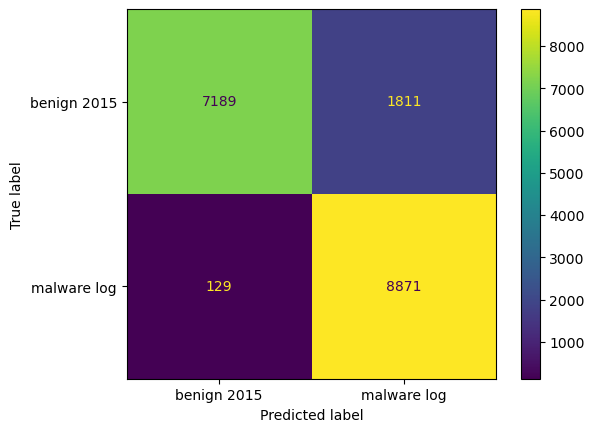

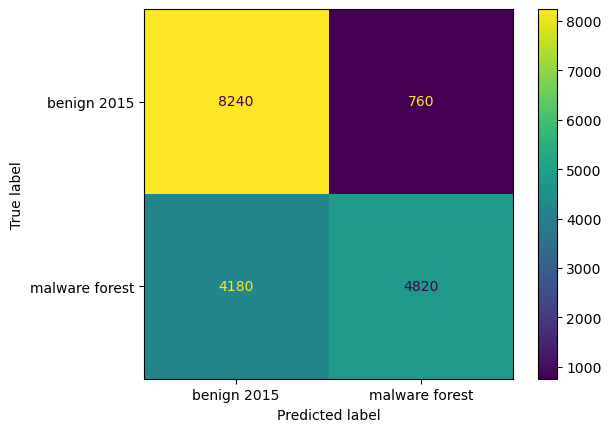

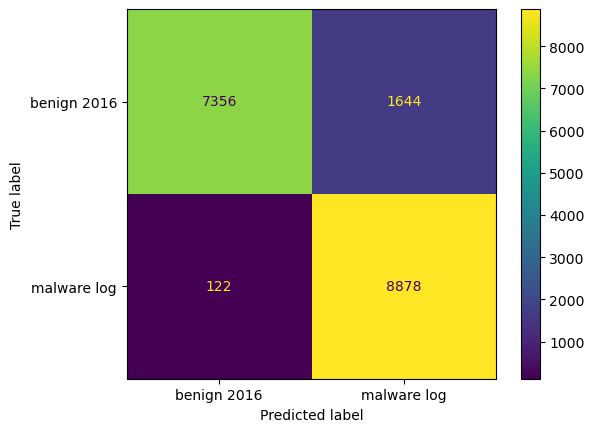

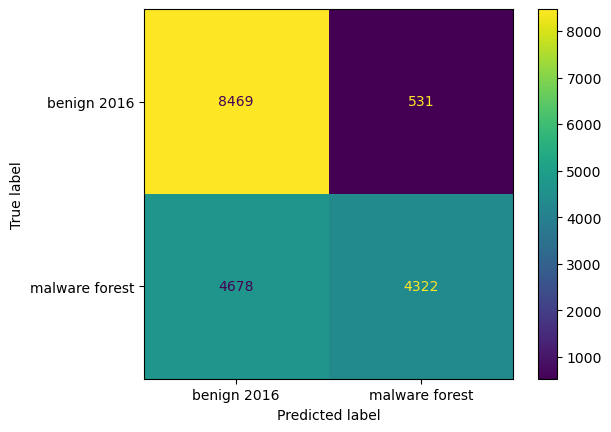

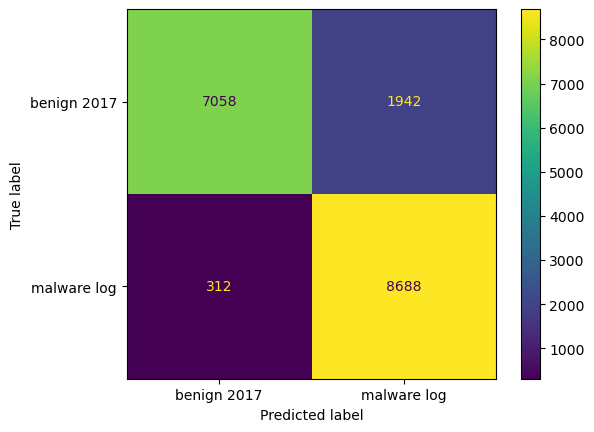

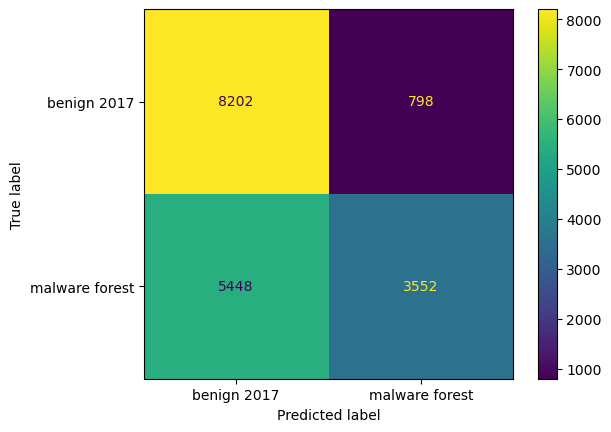

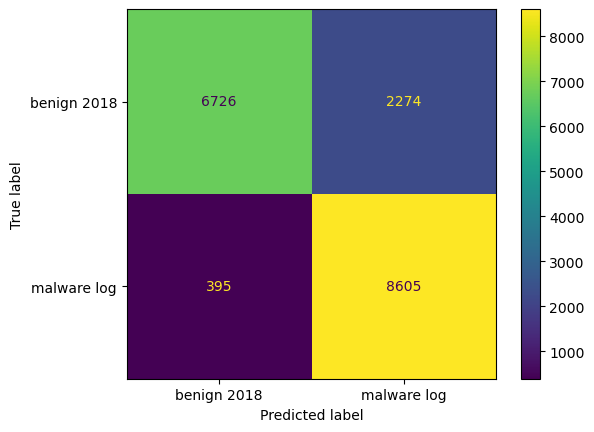

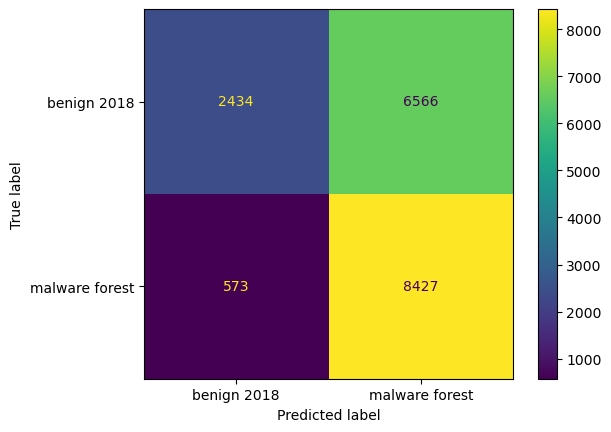

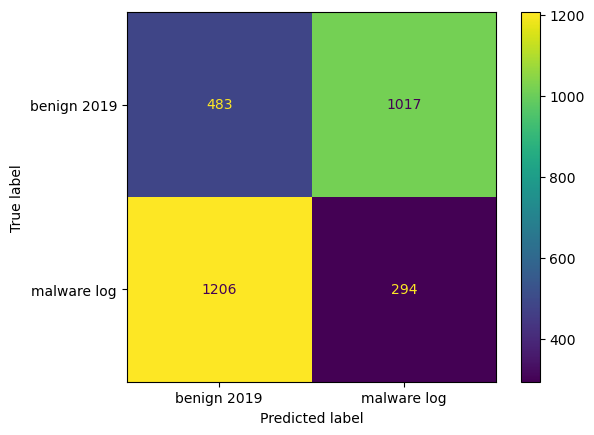

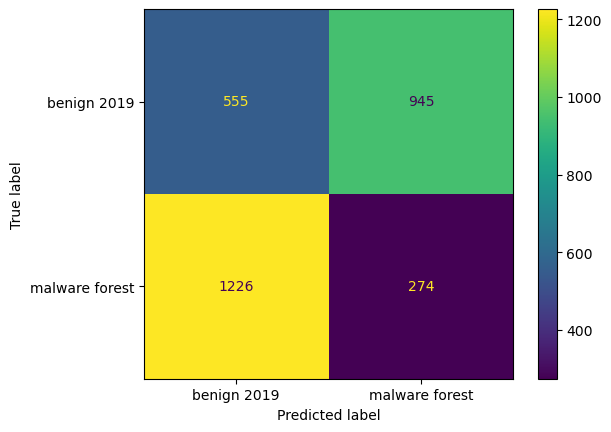

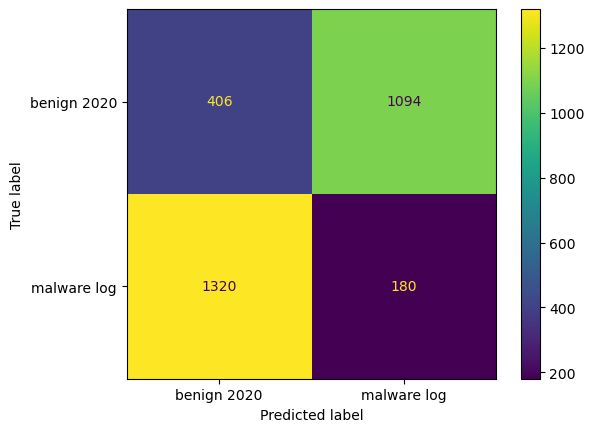

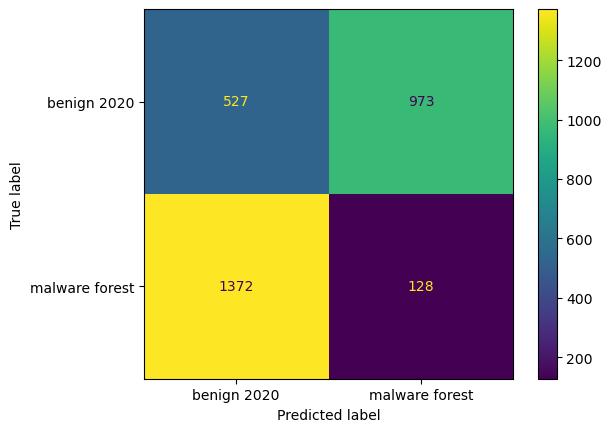

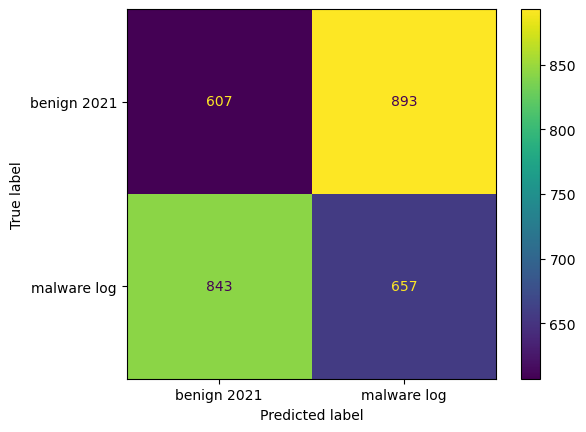

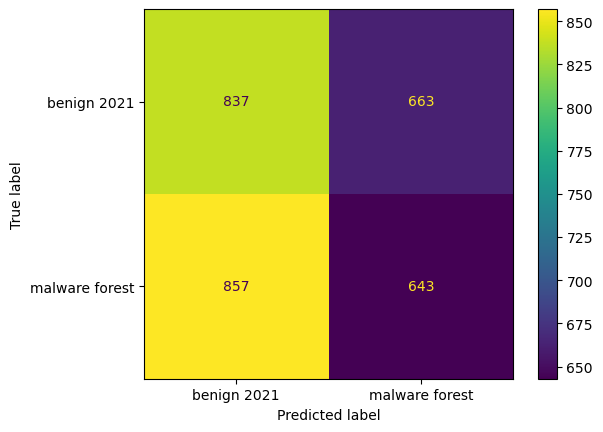

In [34]:
#predict testing data year by year
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for i in range(0,7):
    y_test = testing_data[i]['Target']
    X_test = testing_data[i].drop(['apkname','Target'], axis = 1)
    X_test = scaler.fit_transform(X_test)
    
    year = 2015 + i
    
    y_pred_log = logarithmic.predict(X_test)
    log_acc = accuracy_score(y_test, y_pred_log)
    print("Logarithmic accuracy "+ str(year) + ": " + str(log_acc))
    print(classification_report(y_test.values,y_pred_log))
    cm_1 = confusion_matrix(y_test, y_pred_log)
    cm_display = ConfusionMatrixDisplay(cm_1, display_labels=["benign " + str(year),"malware log"]).plot()

    y_pred_rf = random_forest.predict(X_test)
    rf_acc = accuracy_score(y_test.values, y_pred_rf)
    print("Random Forest accuracy " + str(year) + ": "+ str(rf_acc))
    print(classification_report(y_test.values,y_pred_rf))
    cm_2 = confusion_matrix(y_test, y_pred_rf)
    cm_display = ConfusionMatrixDisplay(cm_2, display_labels=["benign " + str(year),"malware forest"]).plot()

